In [1]:
import matplotlib.pylab as pyl
import numpy as np
from scipy import signal

In [2]:
# We try to stimulate transmission of our message using SSB SC 
# Defining Parameters

A1=1          # message signal Amplitude
Ac=2          # carrier signal Amplitude
fm=10         # message signal frequency taken (10 Hz here)
fc=20*fm      # carrier freq taken 10 times message signal frequency (100 Hz)
mod=1         # Modulation index we take 1

fs=100*fm       # sampling freq 100 times that of message signal(1000 Hz)
Ts=1/fs       # sampling time (0.001 sec)
t = pyl.arange(0,5/fm,Ts)    # Generating the time vector for 5 periods of message signal (period =1/fm)

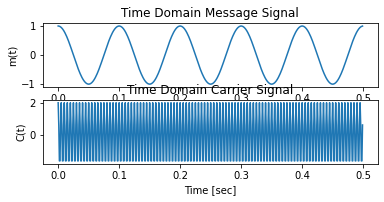

In [3]:
# Defining and Ploting message and carrier signals

message = A1*pyl.cos(2.0*pyl.pi*fm*t) # message signal frequency 10 Hz
carrier = Ac*pyl.cos(2.0*pyl.pi*fc*t) # carrier signal Freq=200Hz
hilbert_trans_carrier = Ac*pyl.sin(2.0*pyl.pi*fc*t) # Carrier signal shifted by pi/2 (cos becomes sin )for using with hilbert transform of message

# show the graph
# modulation signal
pyl.subplot(311)
pyl.plot(t,message)
pyl.xlabel('Time [sec]')
pyl.ylabel('m(t)')
pyl.title('Time Domain Message Signal')

#carrier signal
pyl.subplot(312)
pyl.plot(t,carrier)
pyl.xlabel('Time [sec]')
pyl.ylabel('C(t)')
pyl.title('Time Domain Carrier Signal')

pyl.show()

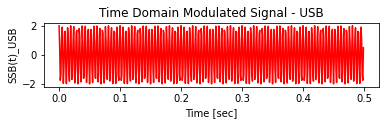

In [4]:
# Creating the SSB Modulated signal and its Fourier Transform

# Hilbert transform of baseband
hilbert_trans_message = np.imag(signal.hilbert(message))

# SSB with Upper Side Band
modulated_signal_usb = message*carrier -hilbert_trans_message*hilbert_trans_carrier
modulated_signal_lsb = message*carrier +hilbert_trans_message*hilbert_trans_carrier


# Plot SSB in Time Domain
pyl.subplot(313)
pyl.plot(t,modulated_signal_usb,'r')
pyl.xlabel('Time [sec]')
pyl.ylabel('SSB(t)_USB')
pyl.title('Time Domain Modulated Signal - USB')
pyl.show()

Text(0.5, 1.0, 'Frequency Domain SSB_LSB Modulated Signal')

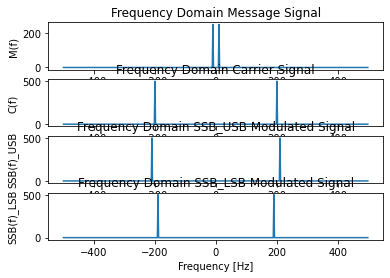

In [6]:
# To plot the signals in frequency domain
modulated_signal_usb_freq = np.fft.fftshift(np.fft.fft(modulated_signal_usb))
modulated_signal_lsb_freq = np.fft.fftshift(np.fft.fft(modulated_signal_lsb))
message_freq = np.fft.fftshift(np.fft.fft(message))
carrier_freq = np.fft.fftshift(np.fft.fft(carrier))
frenq = np.arange(-fs/2, fs/2, fs/len(modulated_signal_usb_freq))

# To plot frequencies of message,carrier , SSB SC modulated signal in same plot
pyl.subplot(411)
pyl.plot(frenq,np.abs(message_freq))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('M(f)')
pyl.title('Frequency Domain Message Signal')
                             
pyl.subplot(412)
pyl.plot(frenq,np.abs(carrier_freq))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('C(f)')
pyl.title('Frequency Domain Carrier Signal')
                    
pyl.subplot(413)
pyl.plot(frenq,np.abs(modulated_signal_usb_freq))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('SSB(f)_USB')
pyl.title('Frequency Domain SSB_USB Modulated Signal')

pyl.subplot(414)
pyl.plot(frenq,np.abs(modulated_signal_lsb_freq))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('SSB(f)_LSB')
pyl.title('Frequency Domain SSB_LSB Modulated Signal')